In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

C:\Users\nbk863\AppData\Local\Temp\ipykernel_12396\2007051729.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state and Jacobian

In [4]:
model.find_ss()

In [5]:
model.calc_jac(do_print=True)

Jacobian calculated in 1.0 mins 4 secs


# Find IRF

In [6]:
model.set_exo_ss()

In [7]:
Tshock = np.concatenate((np.ones(50), np.zeros(par.T-50)),axis=0)
shock = 0.1*par.r_hh
persistence = 0.80**np.arange(par.T)
par.r_hh[:] = par.r_hh[:] + shock*persistence

In [8]:
model.find_IRF()

initial:
t1-t0 = 0.01122 secs
it = 4
    max. abs. error = 5.61e-12
    5.61e-12 in A_R_ini_error
    1.23e-12 in Aq_diff
    5.77e-15 in bargaining_cond
    2.11e-15 in FOC_capital_agency
    3.11e-15 in FOC_K_ell
    3.24e-12 in mkt_clearing
    3.56e-14 in PC

solve: t1-t0 = 0.12167 secs
evaluate + update: t3-t2 = 0.07879 secs


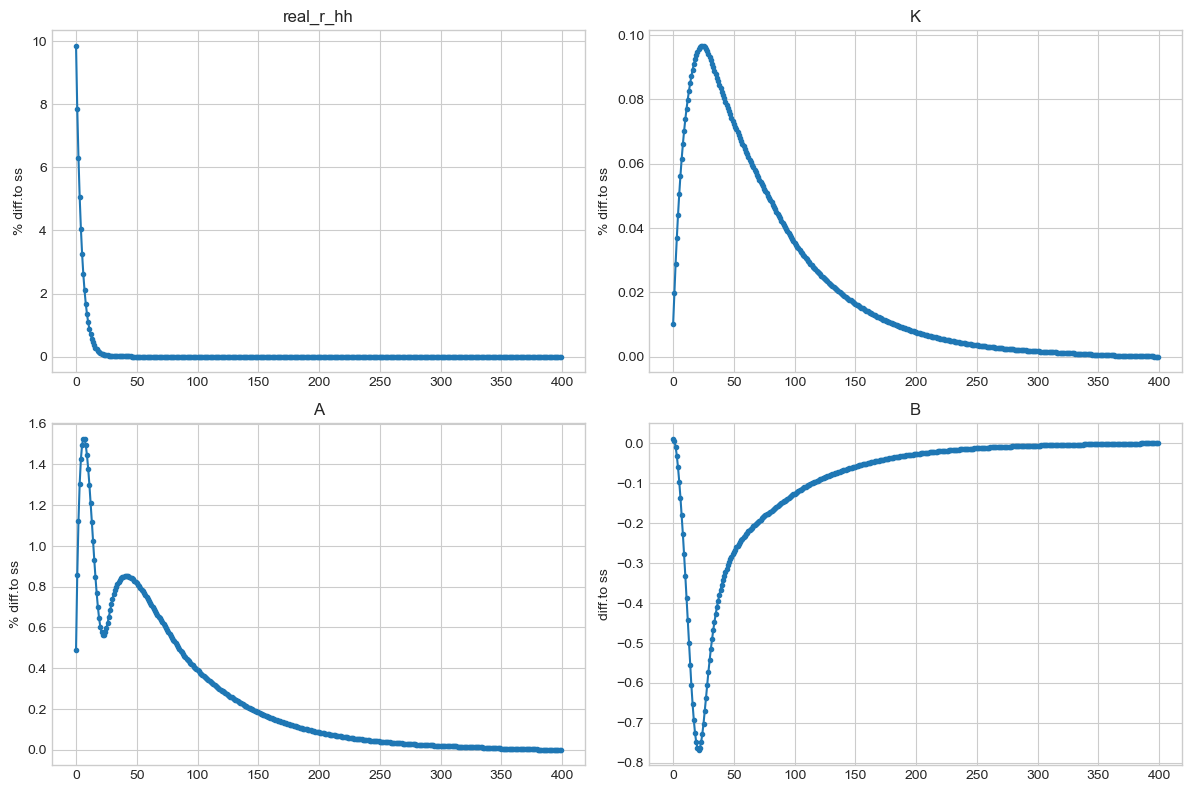

In [9]:
model.plot_IRF(varlist=['real_r_hh','K','A','B'],T_IRF=par.T,ncol=2)

### National accouting - quantities

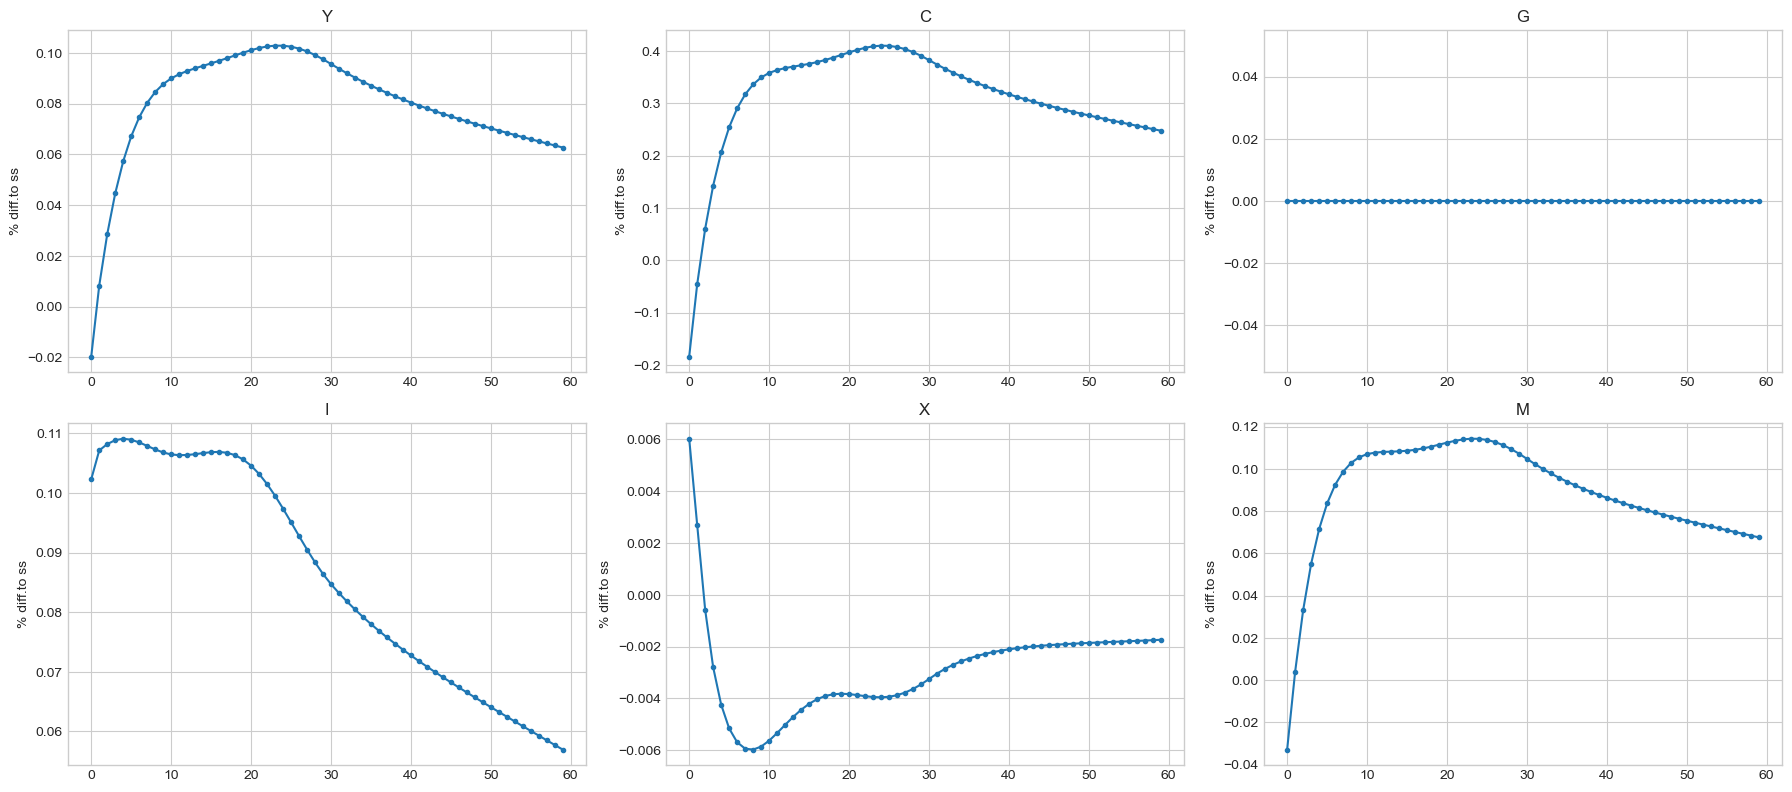

In [10]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

### National accouting - prices

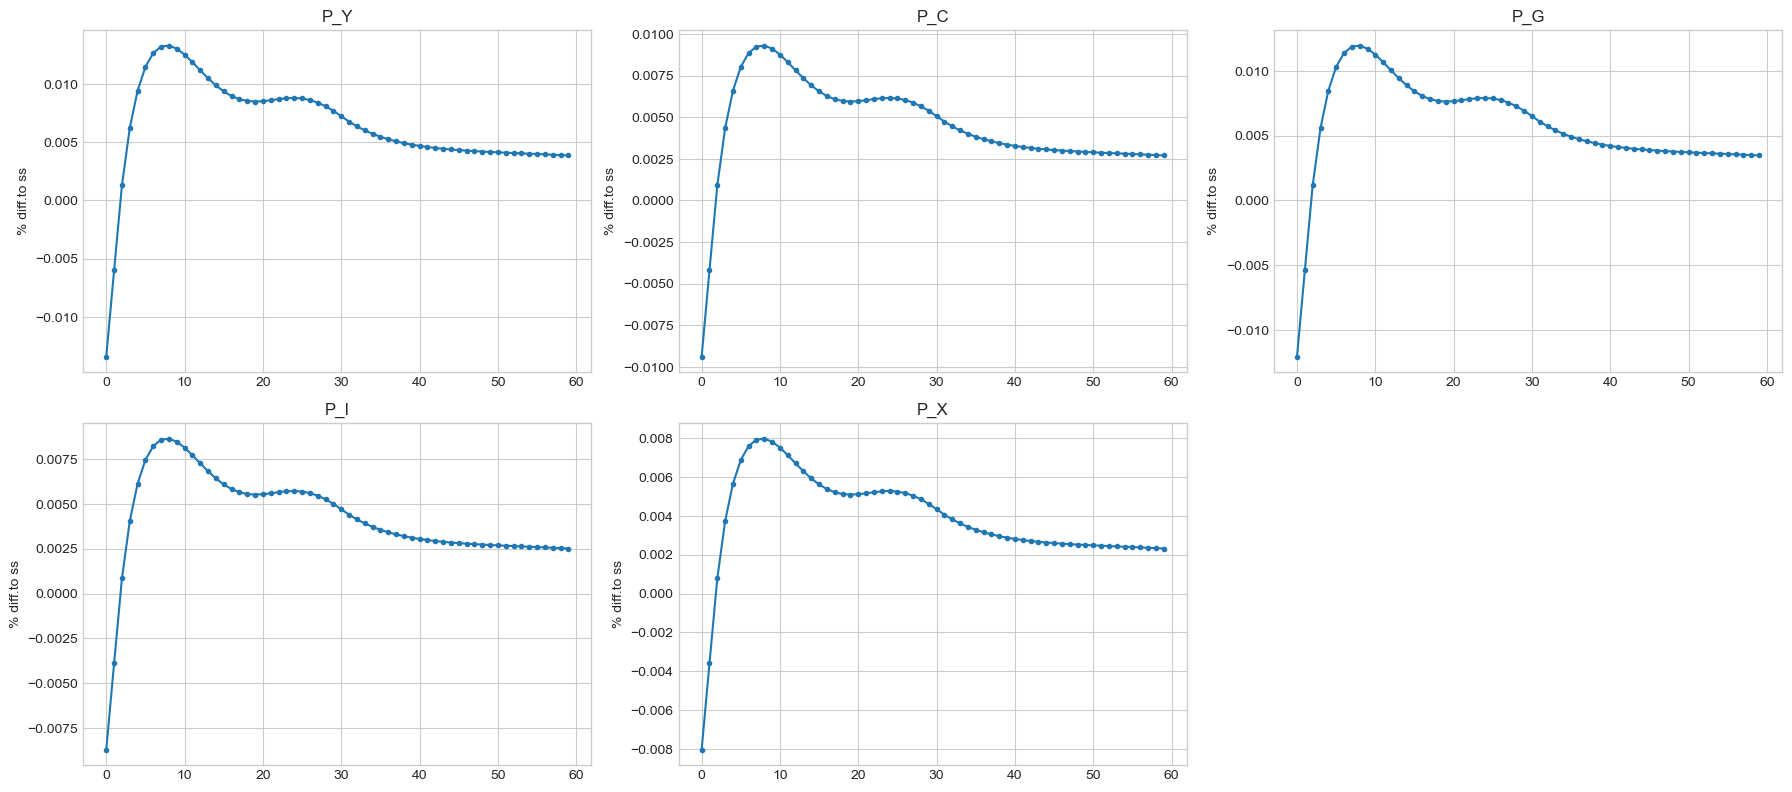

In [11]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X'])

### Labor market

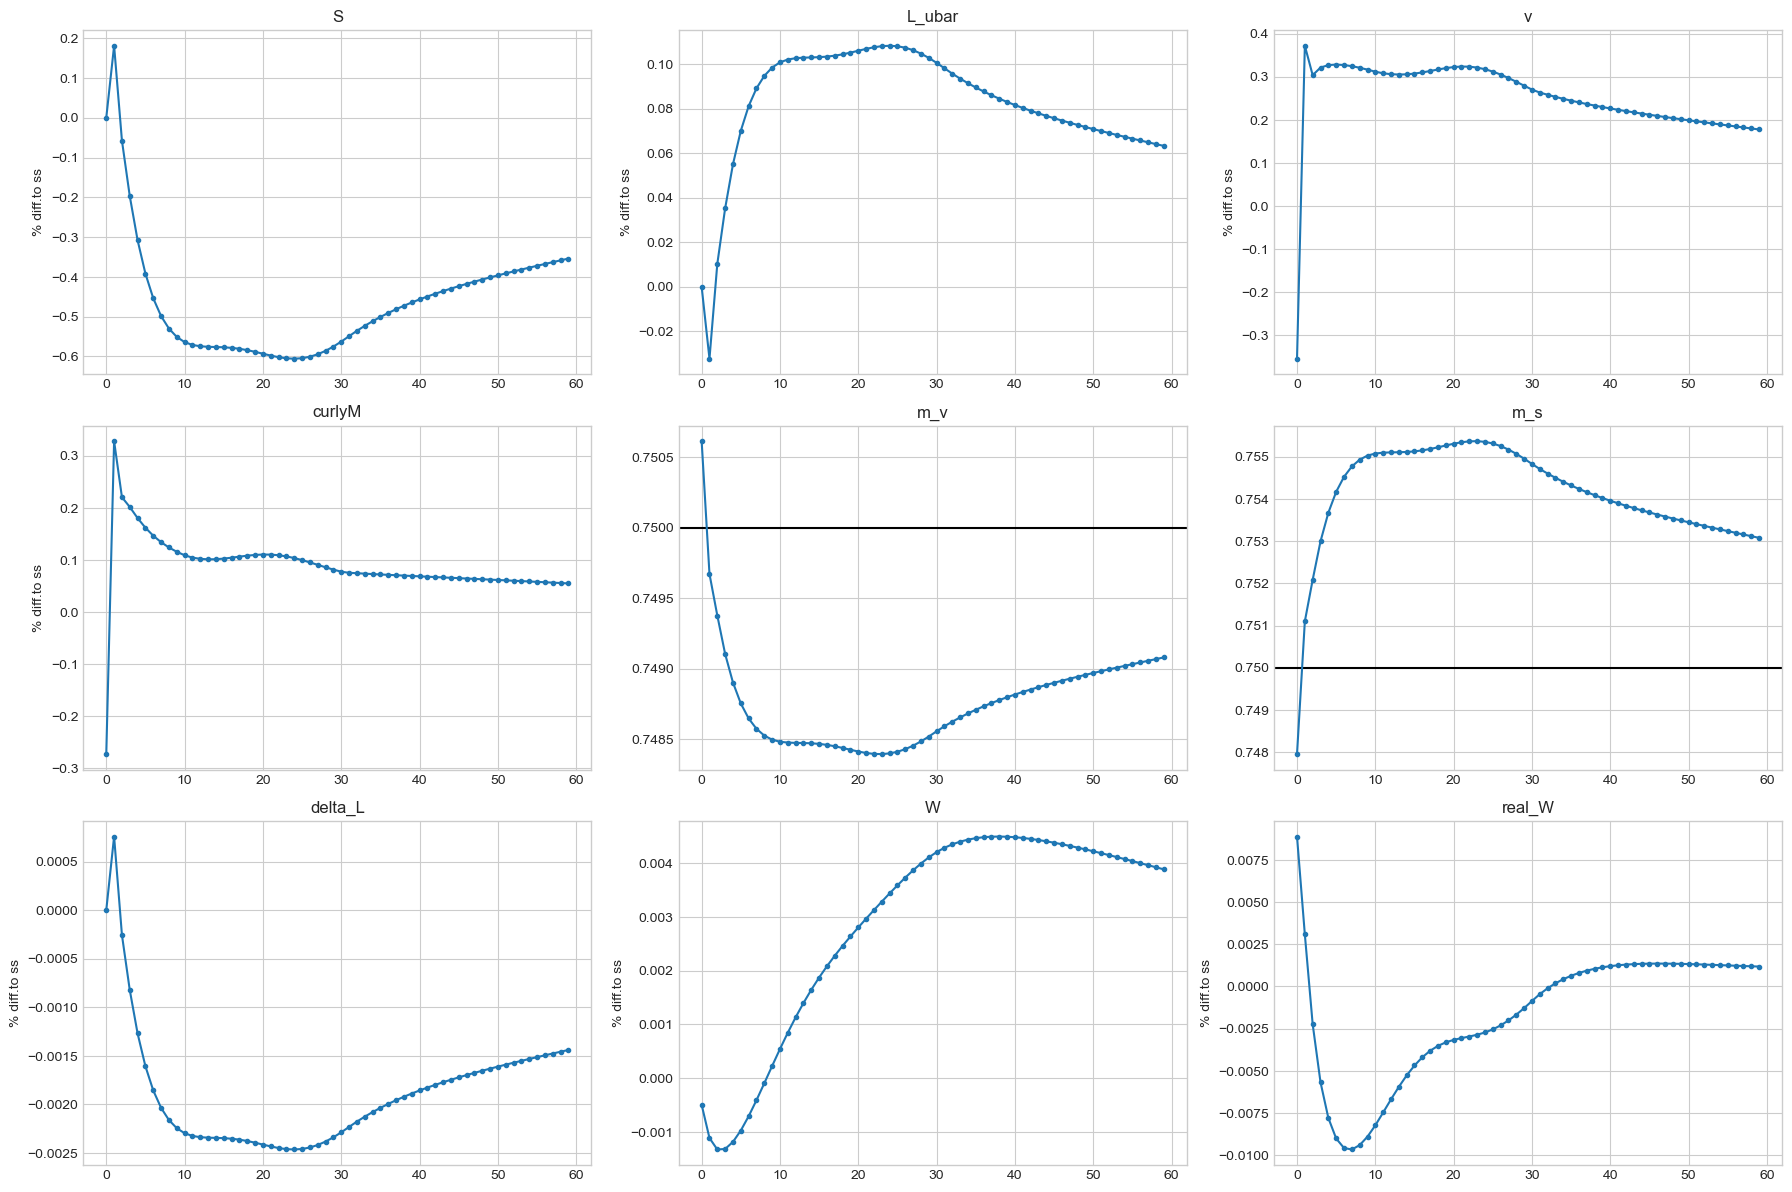

In [12]:
model.plot_IRF(varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### Capital accumulation

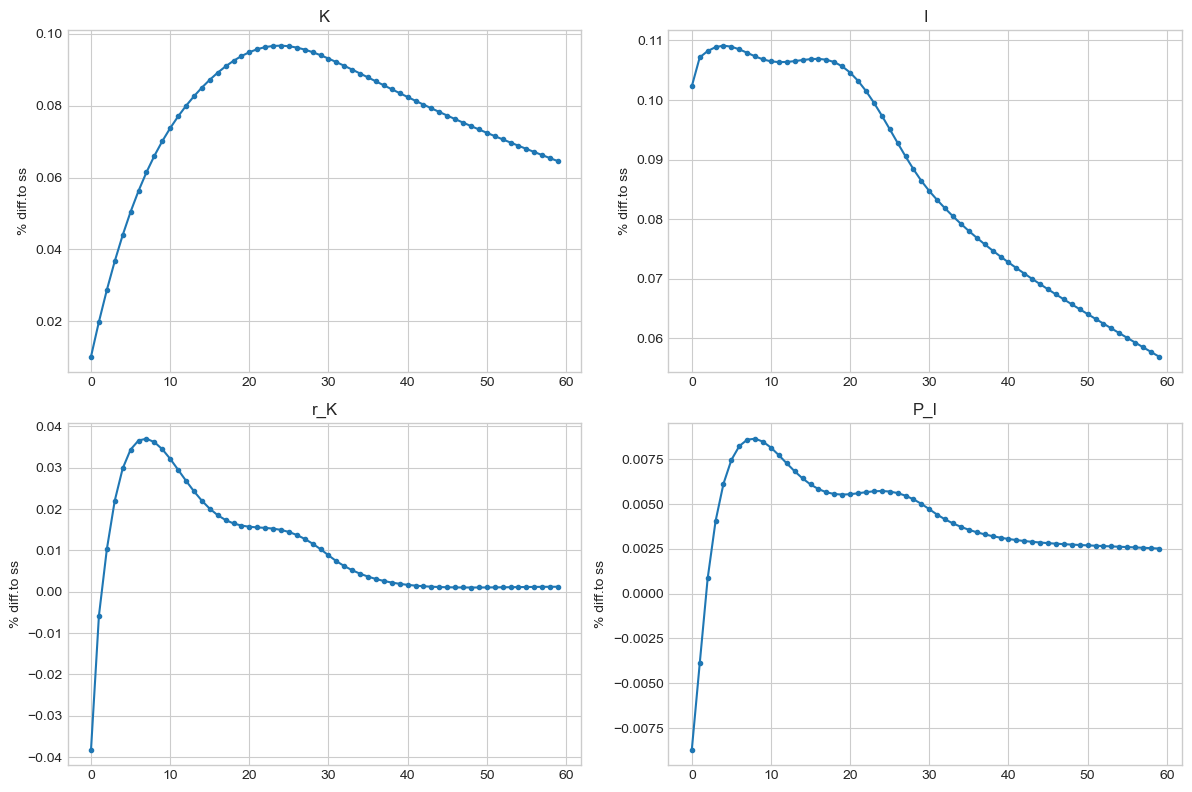

In [13]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

### Production firms

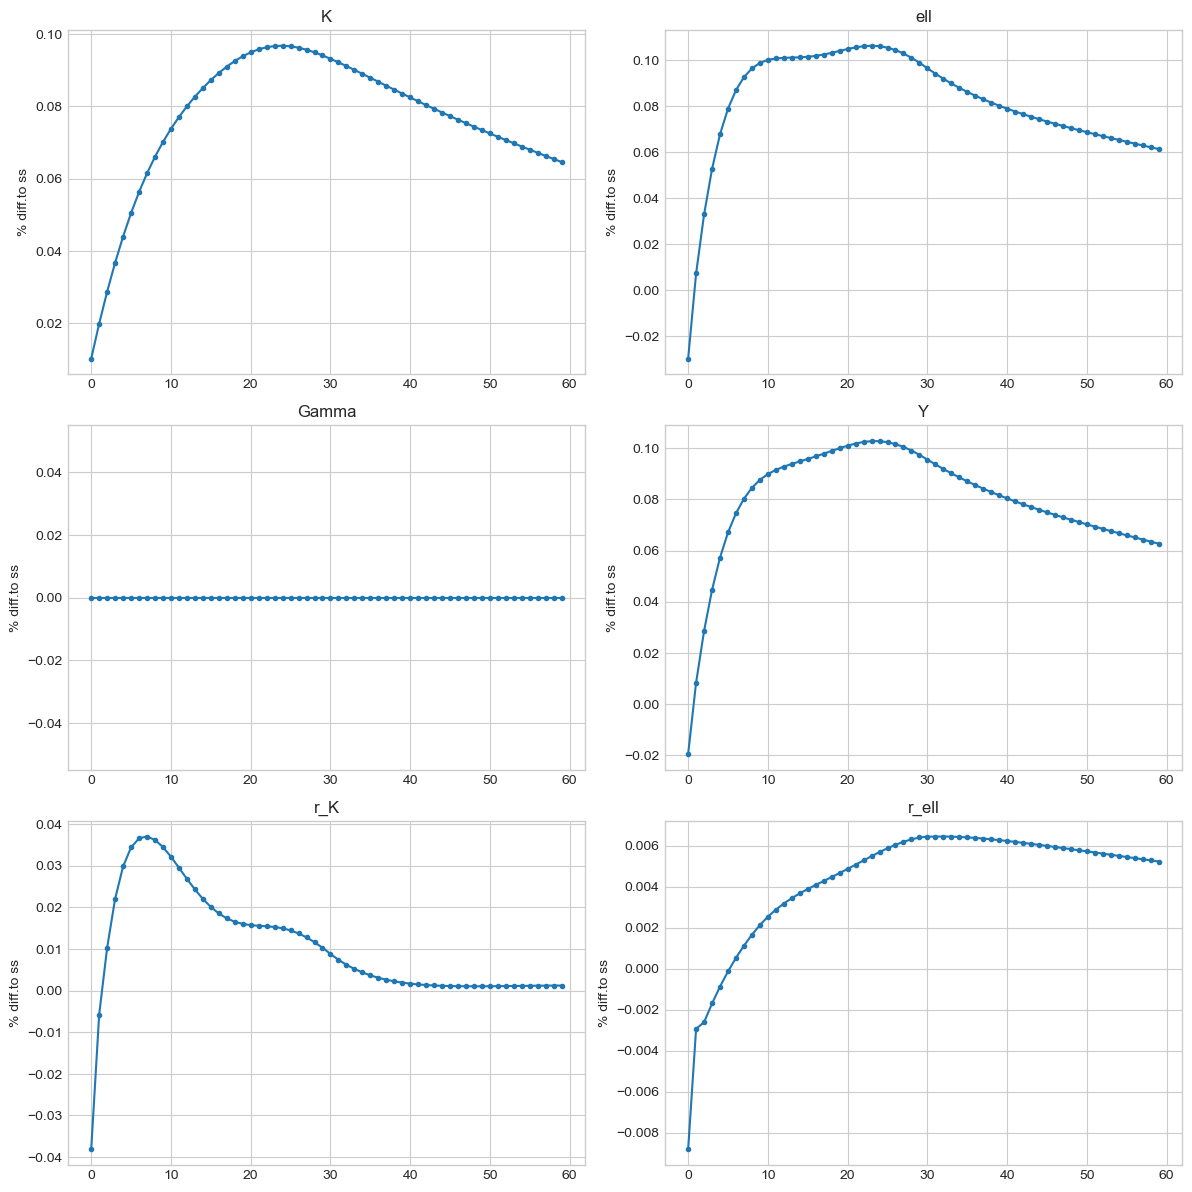

In [14]:
model.plot_IRF(varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2)

### Phillips curve

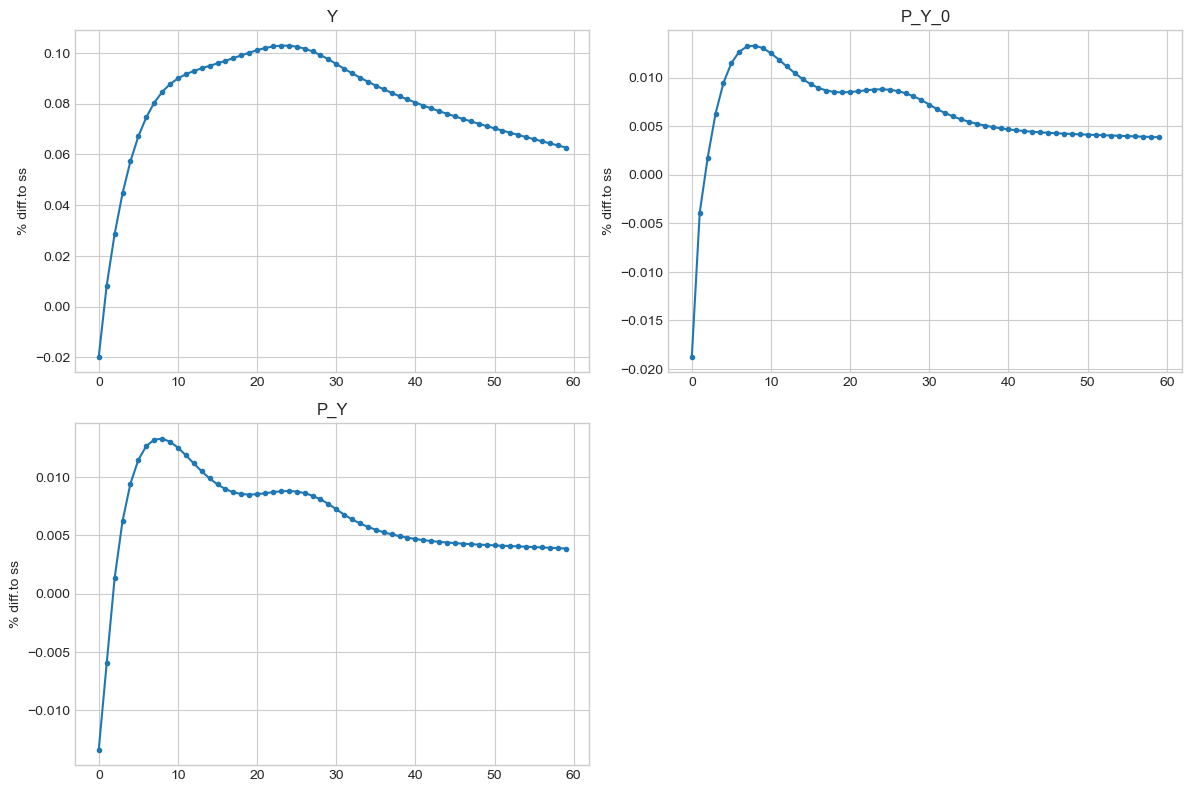

In [15]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'],ncol=2)

### Government

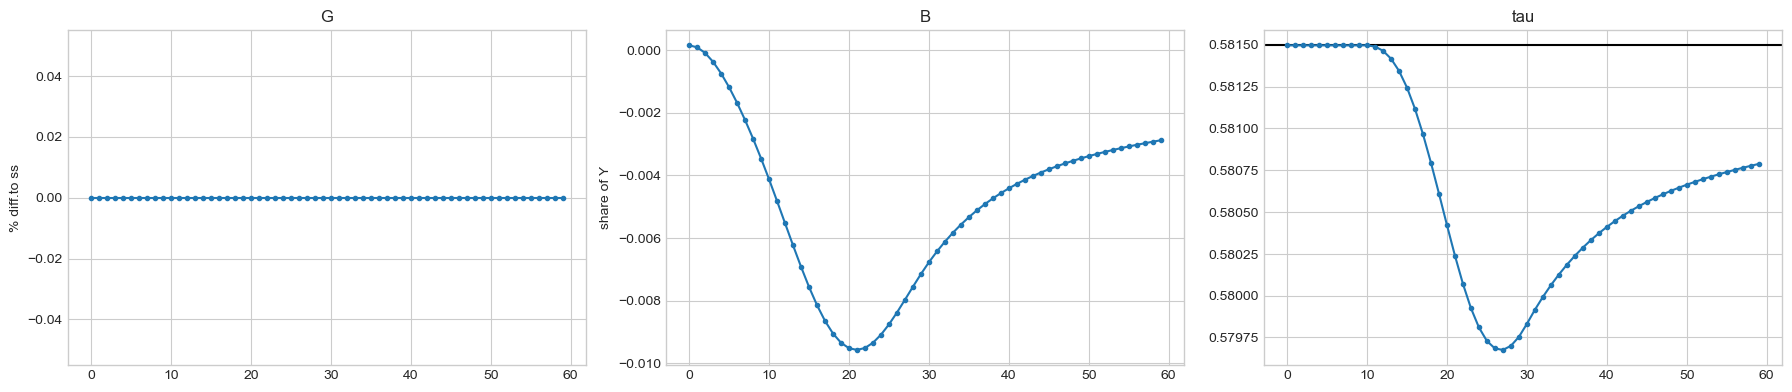

In [16]:
model.plot_IRF(varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### Households - aggregate

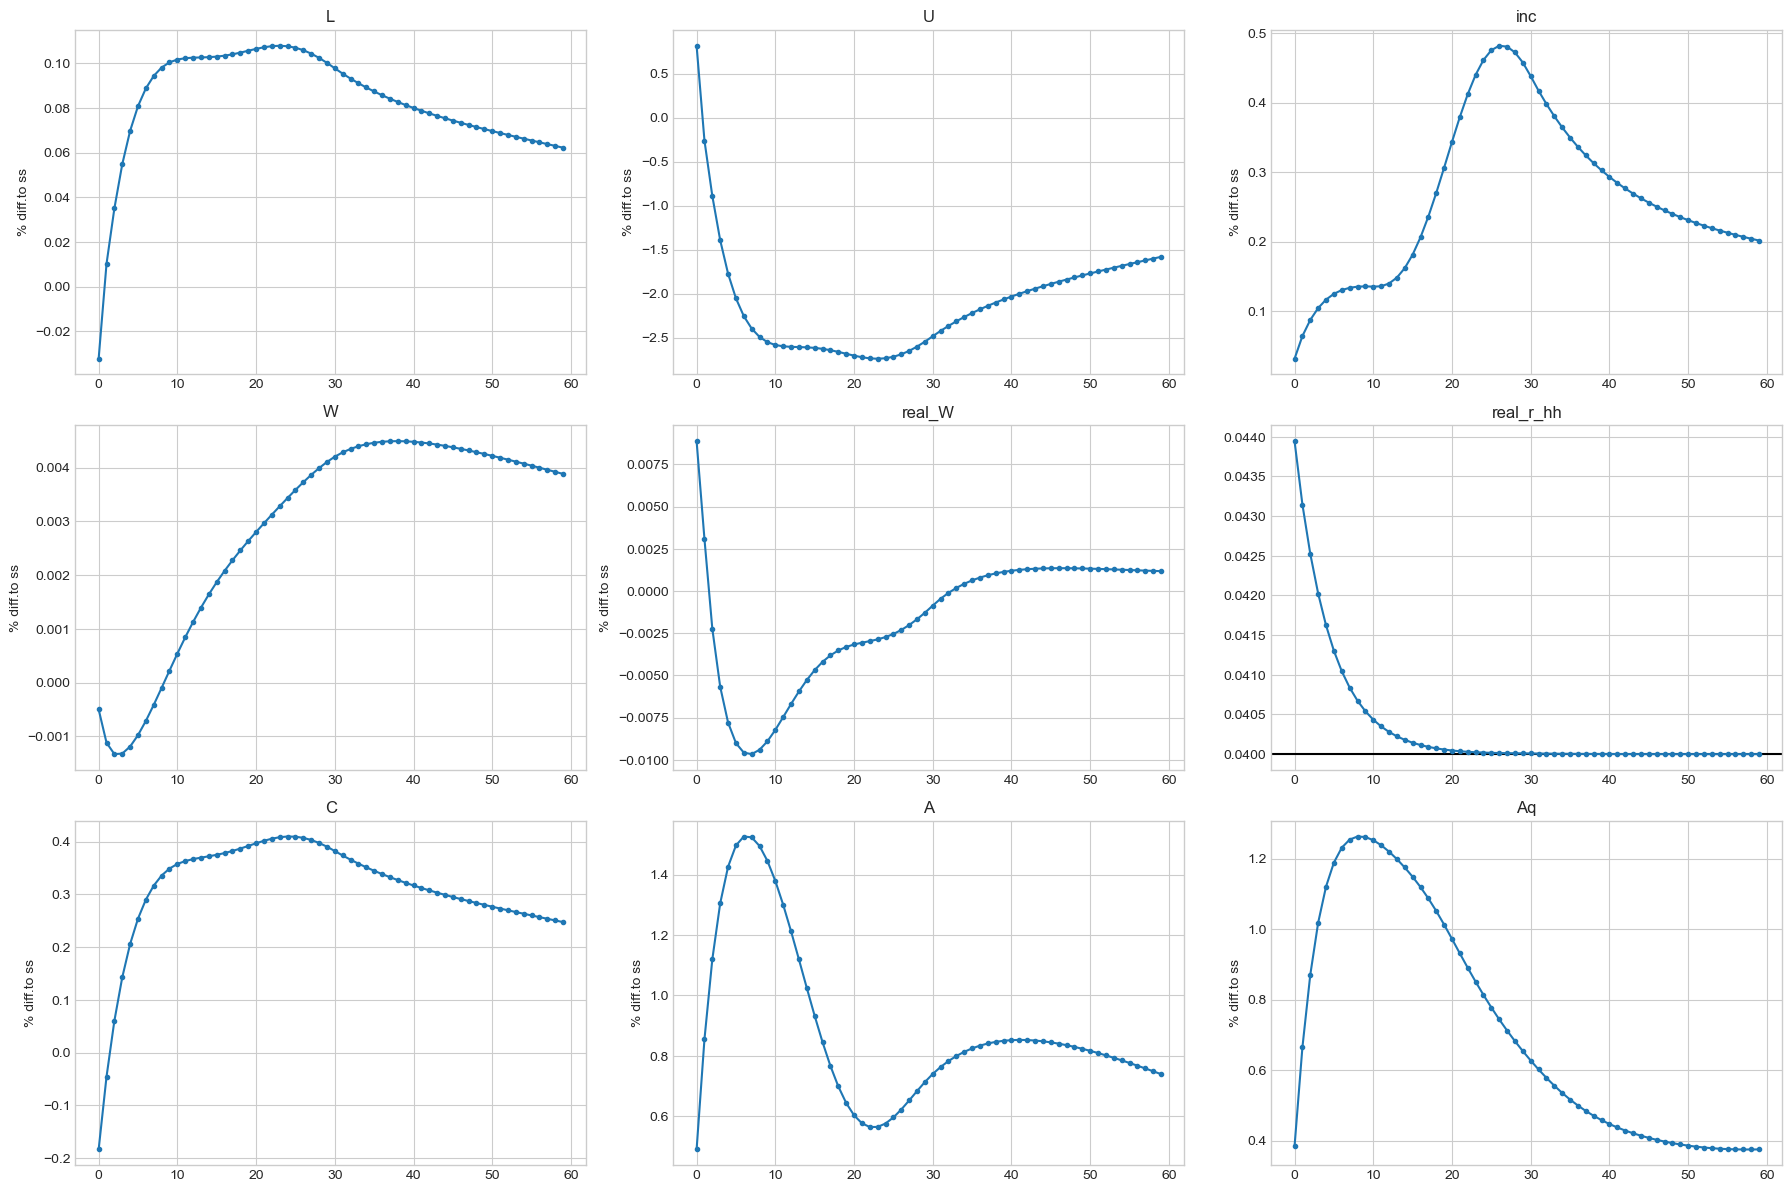

In [17]:
model.plot_IRF(varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],ncol=3,abs=['real_r_hh'])

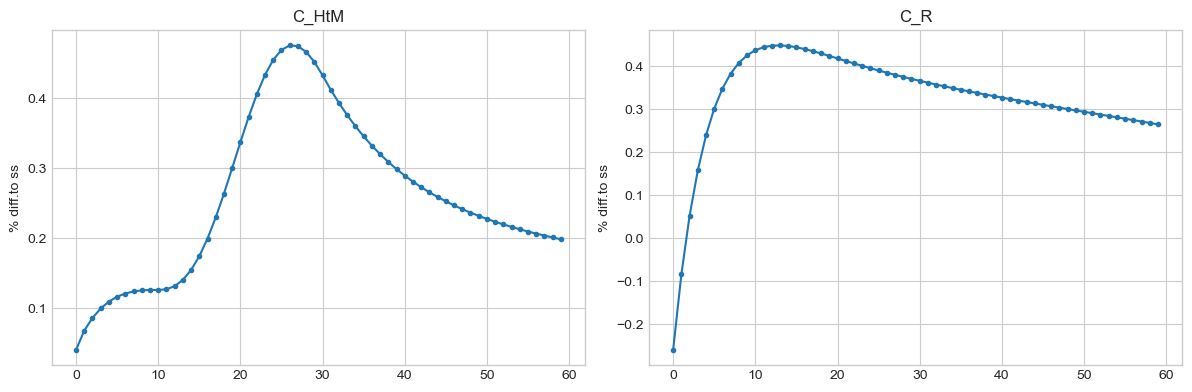

In [18]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2)

### Households - life-cycle

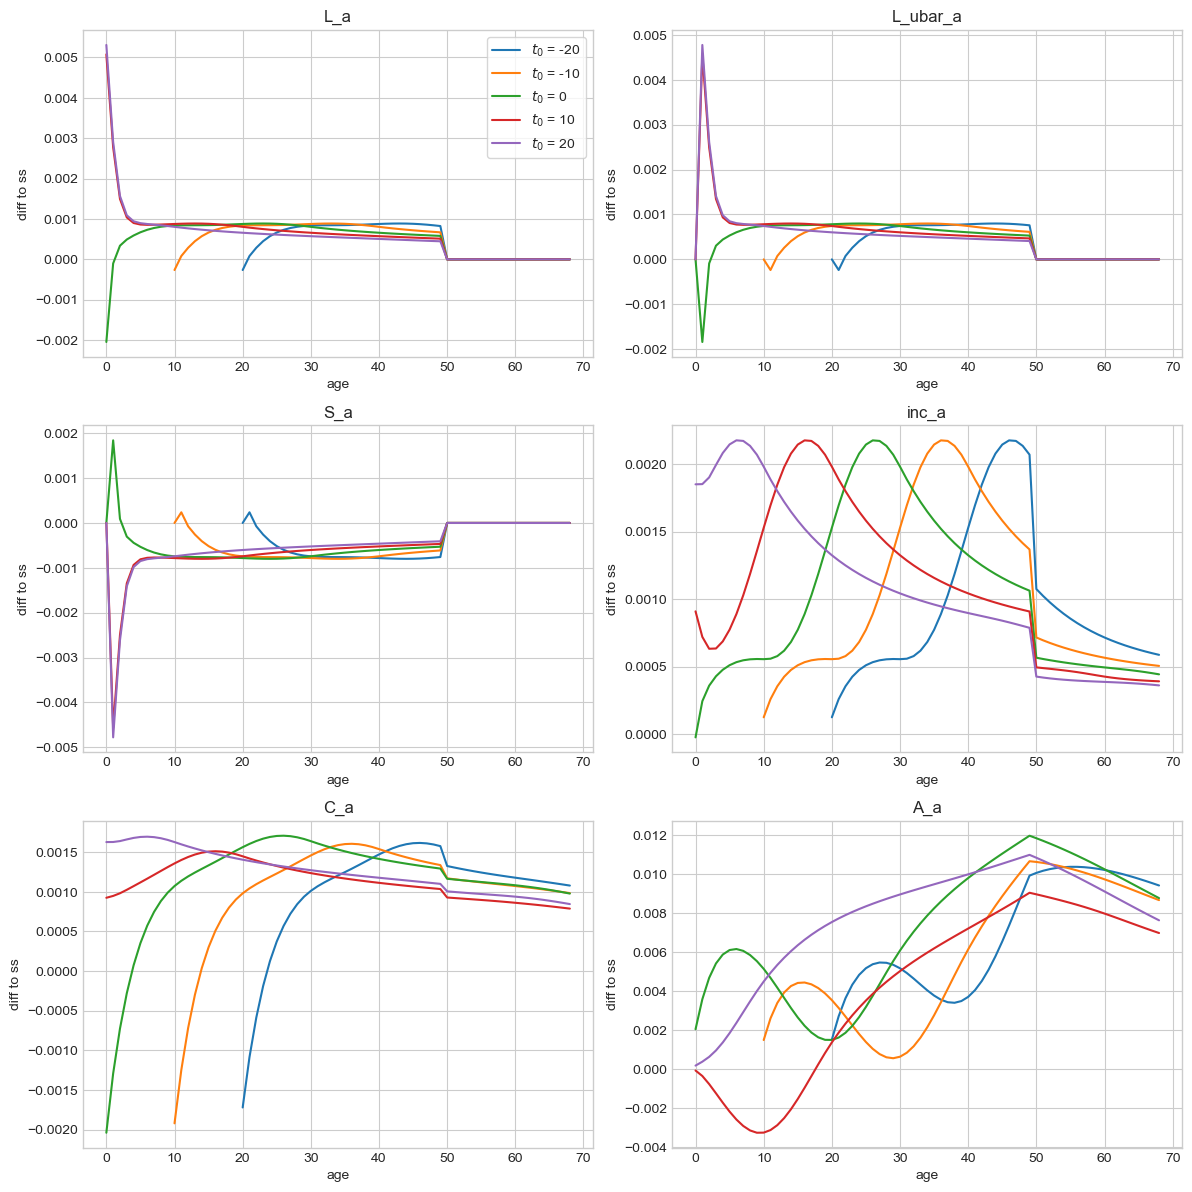

In [19]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])